Importação das bibliotecas

In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import random

In [3]:
import pandas as pd

data = pd.read_csv('/content/hepatitis.data', header=None)
data.to_csv('hepatitis.csv', index=False)

In [4]:
data = data.to_numpy()

X = data[:,0:-1]
y = data[:,-1]

In [ ]:
print(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('hepatitis.csv')
data = data[data != '?'].dropna()
X = data.values
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
print(data)

In [9]:
data = pd.read_csv('hepatitis.csv')
data = data[data != '?'].dropna()

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [61]:
from sklearn.model_selection import train_test_split

p = 1
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = p, random_state = 42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('hepatitis.csv')

data = data.replace('?', float('nan')).fillna(data.mean())

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k = 3
model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


<ipython-input-62-c59c4d8df640>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.replace('?', float('nan')).fillna(data.mean())


In [ ]:
data = data.replace('?', float('nan')).fillna(data.mean(numeric_only=True))
print(data)

In [ ]:
data = data.dropna()
data = data.dropna(axis='columns')
print(data)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=5

model = KNeighborsClassifier(n_neighbors=k, metric ='euclidean')

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("Acuracia: ",score)

Acuracia:  0.95


In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, bootstrap = True,
                               class_weight = None,
                               max_depth = None,
                               criterion= 'gini',
                               max_features = 'sqrt',
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               min_samples_leaf = 1, min_samples_split = 2,
                               min_weight_fraction_leaf = 0.0, n_jobs = 1,
                               oob_score = False,
                               random_state = None, verbose = 0,
                               warm_start = False)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Acuracia",score)


Acuracia 0.9


In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver ='lbfgs', max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("ACurácia: ",score)

ACurácia:  1.0


Acuracia:  0.95


[Text(0.5, 0.8333333333333334, 'x[0] <= -2.17\nentropy = 1.582\nsamples = 80\nvalue = [25, 29, 26]'),
 Text(0.25, 0.5, 'x[0] <= -2.794\nentropy = 0.235\nsamples = 26\nvalue = [25, 1, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.75, 0.5, 'x[0] <= 1.643\nentropy = 0.999\nsamples = 54\nvalue = [0, 28, 26]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.216\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 25]')]

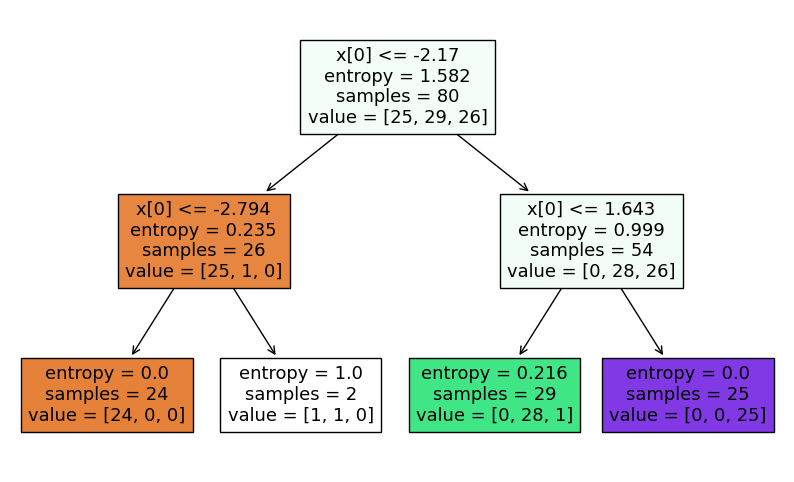

In [68]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_pred, y_test)
print('Acuracia: ',score)

plt.figure(figsize=(10,6))
tree.plot_tree(model.fit(x_train, y_train), filled = True)

In [69]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("Acurácia: ",score)

Acurácia:  1.0


In [70]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_pred, y_test)
print('Acuracia: ',score)

Acuracia:  0.9


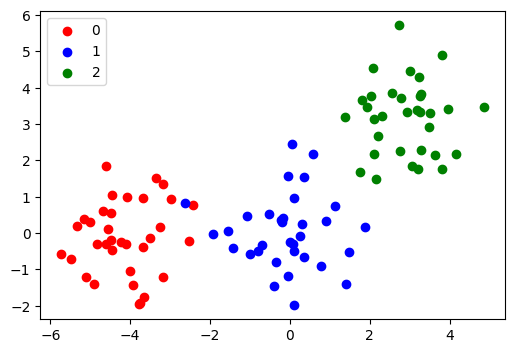

In [71]:
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as skdata

plt.figure(figsize=(6,4))
n_samples = 100

centers = [(-4,0), (0,0),(3,3)]

X,y = skdata.make_blobs(n_samples = 100, n_features=2, cluster_std=1.0,
                        centers=centers, shuffle = False, random_state = 42)

d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns = ['X1','X2','y'])
features_names = ['X1','X2']
class_labels = np.unique(y)

colors = ['red','blue','green','black']
aux = 0

for c in class_labels:
  ind = np.where(y==c)
  plt.scatter(X[ind,0][0],X[ind,1][0], color = colors[aux], label = c)
  aux = aux+1

plt.legend()
plt.show()

vk = [1, 5, 10]

In [72]:
import torch

In [73]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [74]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
dados = bc.data
classes = bc.target
nomesClasses = bc.target_names

In [ ]:
classes.size

In [ ]:
dados

In [75]:
for coluna in dados.T:
  # print(coluna.max()) # Valores máximos de cada coluna
  if coluna.max() < 1:
    coluna = coluna / 1
  elif coluna.max() < 10:
    coluna /= 10
  elif coluna.max() < 100:
    coluna /= 100
  elif coluna.max() < 1000:
    coluna /= 1000
  elif coluna.max() < 10000:
    coluna /= 10000
  else:
    print('Erro')

In [ ]:
entrada = torch.FloatTensor(dados)
saida = torch.FloatTensor(classes)
print(saida)

In [ ]:
from sklearn.utils import shuffle
print(entrada, saida)
entrada, saida = shuffle(entrada, saida)
print(entrada, saida)

In [ ]:
entrada_treinamento = entrada[0:525, :]
saida_treinamento = saida[0:525]
entrada_testes = entrada[525:569, :]
saida_testes = saida[525:569]
print(entrada_testes)
print(saida_testes)

In [ ]:
# Montar o modelo para o treinamento
print(entrada_treinamento.size())
input_size = entrada_treinamento.size()[1]
hidden_size = 25
modelo = Net(input_size, hidden_size)
print(modelo)

# Configurações do modelo
criterion = torch.nn.BCELoss() # Binary Cross Entropy
criterion = torch.nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.8, momentum = 0.3)

In [80]:
epochs = 30000 # Quantidade de épocas de treinamento

errors = [] # Criando um array vazio para guardar os erros de cada epoca

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  #Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 10000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  #Backward pass
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.008167236112058163
Epoch 10000: train loss: 0.0077016050927340984
Epoch 20000: train loss: 0.007322389632463455


In [81]:
y_pred = modelo(entrada_testes)

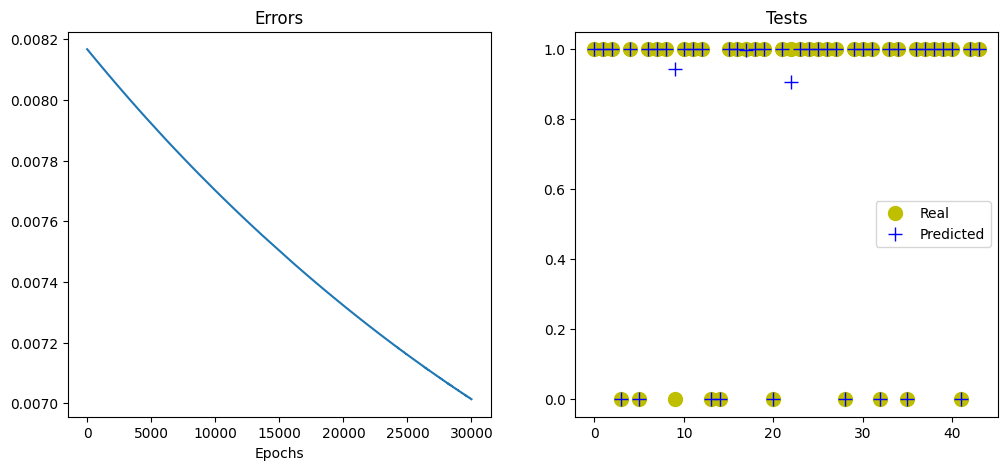

In [82]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)